Object Detection

In [ ]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install inflect
!pip install phonemizer

In [ ]:
!sudo apt-get update
!sudo apt-get install espeak-ng
!pip install py-espeak-ng

In [ ]:
# !pip install helper

In [5]:
from transformers import pipeline

In [ ]:
# helper.py
# import io
# import matplotlib.pyplot as plt
# import requests
# import inflect
# from PIL import Image

# def load_image_from_url(url):
#     return Image.open(requests.get(url, stream=True).raw)

# def render_results_in_image(in_pil_img, in_results):
#     plt.figure(figsize=(16, 10))
#     plt.imshow(in_pil_img)

#     ax = plt.gca()

#     for prediction in in_results:

#         x, y = prediction['box']['xmin'], prediction['box']['ymin']
#         w = prediction['box']['xmax'] - prediction['box']['xmin']
#         h = prediction['box']['ymax'] - prediction['box']['ymin']

#         ax.add_patch(plt.Rectangle((x, y),
#                                    w,
#                                    h,
#                                    fill=False,
#                                    color="green",
#                                    linewidth=2))
#         ax.text(
#            x,
#            y,
#            f"{prediction['label']}: {round(prediction['score']*100, 1)}%",
#            color='red'
#         )

#     plt.axis("off")

#     # Save the modified image to a BytesIO object
#     img_buf = io.BytesIO()
#     plt.savefig(img_buf, format='png',
#                 bbox_inches='tight',
#                 pad_inches=0)
#     img_buf.seek(0)
#     modified_image = Image.open(img_buf)

#     # Close the plot to prevent it from being displayed
#     plt.close()

#     return modified_image

# def summarize_predictions_natural_language(predictions):
#     summary = {}
#     p = inflect.engine()

#     for prediction in predictions:
#         label = prediction['label']
#         if label in summary:
#             summary[label] += 1
#         else:
#             summary[label] = 1

#     result_string = "In this image, there are "
#     for i, (label, count) in enumerate(summary.items()):
#         count_string = p.number_to_words(count)
#         result_string += f"{count_string} {label}"
#         if count > 1:
#           result_string += "s"

#         result_string += " "

#         if i == len(summary) - 2:
#           result_string += "and "

#     # Remove the trailing comma and space
#     result_string = result_string.rstrip(', ') + "."

#     return result_string


# ##### To ignore warnings #####
# import warnings
# import logging
# from transformers import logging as hf_logging

# def ignore_warnings():
#     # Ignore specific Python warnings
#     warnings.filterwarnings("ignore", message="Some weights of the model checkpoint")
#     warnings.filterwarnings("ignore", message="Could not find image processor class")
#     warnings.filterwarnings("ignore", message="The `max_size` parameter is deprecated")

#     # Adjust logging for libraries using the logging module
#     logging.basicConfig(level=logging.ERROR)
#     hf_logging.set_verbosity_error()

# ########

In [ ]:
!cat helper.py

In [ ]:
!ls

helper.py  sample_data


In [7]:
import sys
sys.path.append('/content/helper.py')

In [8]:
import sys
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', '/content/helper.py']


In [ ]:
!ls /usr/local/lib/python3.10/dist-packages/helper

config.py  controller.py  __init__.py  params.json  parser.py  __pycache__  setupext.py  unix.py


In [9]:
from helper import load_image_from_url, render_results_in_image

Build the object-detection pipeline using 🤗 Transformers Library

This model was release with the paper End-to-End Object Detection with Transformers from Carion et al. (2020)

In [10]:
from transformers.utils import logging
logging.set_verbosity_error()

from helper import ignore_warnings
ignore_warnings()

In [11]:
od_pipe = pipeline("object-detection", "facebook/detr-resnet-50")

config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

In [12]:
from PIL import Image

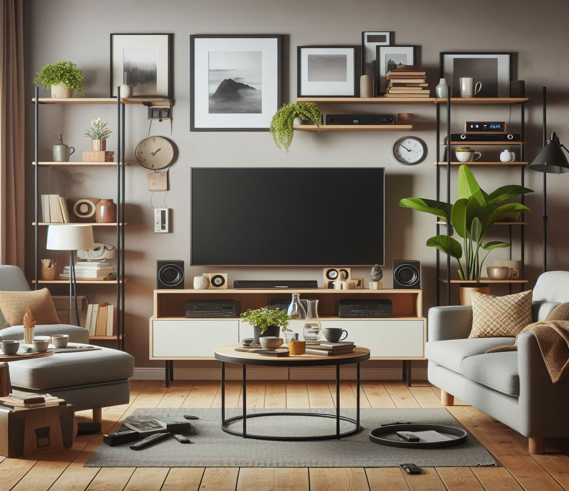

In [34]:
raw_image = Image.open('/content/Home.png')
raw_image.resize((569, 491))

In [35]:
pipeline_output = od_pipe(raw_image)

In [36]:
processed_image = render_results_in_image(
    raw_image,
    pipeline_output)

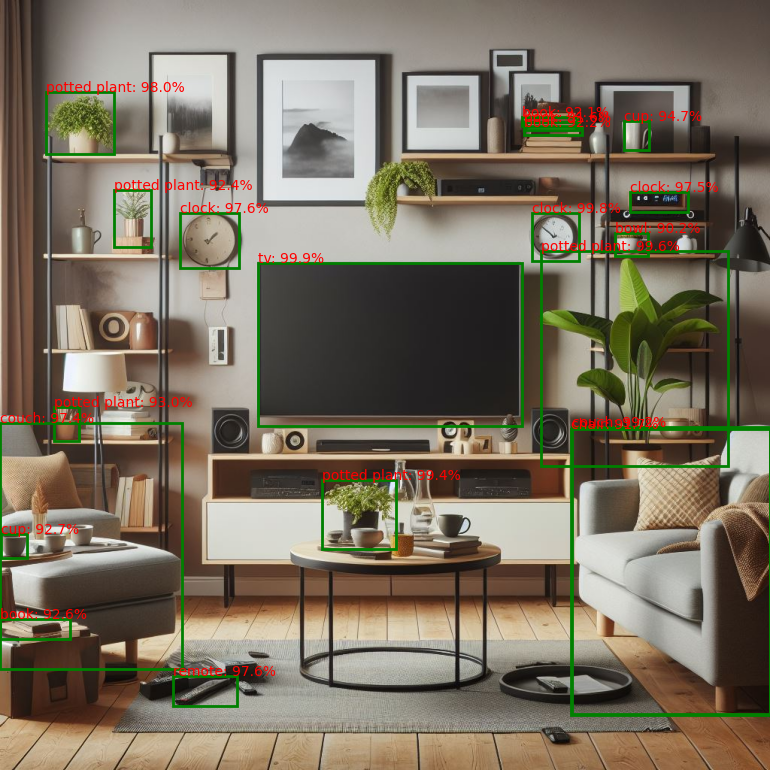

In [37]:
processed_image

### Using `Gradio` as a Simple Interface

- Use [Gradio](https://www.gradio.app) to create a demo for the object detection app.
- The demo makes it look friendly and easy to use.
- You can share the demo with your friends and colleagues as well.

In [38]:
import os
import gradio as gr

In [18]:
def get_pipeline_prediction(pil_image):

    pipeline_output = od_pipe(pil_image)

    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

In [19]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image",
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

In [20]:
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b2bb8fe077ae030c56.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
# demo.launch(share=True, server_port=int(os.environ['PORT1']))

KeyError: 'PORT1'

In [21]:
demo.close()

Closing server running on port: 7860


Make an AI Powered Audio Assistant
Combine the object detector with a text-to-speech model that will help dictate what is inside the image.

Inspect the output of the object detection pipeline

In [39]:
pipeline_output

[{'score': 0.9209775328636169,
  'label': 'book',
  'box': {'xmin': 694, 'ymin': 155, 'xmax': 767, 'ymax': 167}},
 {'score': 0.9763190150260925,
  'label': 'clock',
  'box': {'xmin': 239, 'ymin': 283, 'xmax': 317, 'ymax': 356}},
 {'score': 0.9935528039932251,
  'label': 'potted plant',
  'box': {'xmin': 428, 'ymin': 638, 'xmax': 526, 'ymax': 729}},
 {'score': 0.9804555177688599,
  'label': 'potted plant',
  'box': {'xmin': 61, 'ymin': 122, 'xmax': 151, 'ymax': 204}},
 {'score': 0.9015958905220032,
  'label': 'bowl',
  'box': {'xmin': 818, 'ymin': 310, 'xmax': 861, 'ymax': 340}},
 {'score': 0.9916093945503235,
  'label': 'couch',
  'box': {'xmin': 760, 'ymin': 568, 'xmax': 1023, 'ymax': 949}},
 {'score': 0.9748372435569763,
  'label': 'clock',
  'box': {'xmin': 837, 'ymin': 255, 'xmax': 915, 'ymax': 281}},
 {'score': 0.9265618324279785,
  'label': 'cup',
  'box': {'xmin': 1, 'ymin': 709, 'xmax': 36, 'ymax': 741}},
 {'score': 0.9216192364692688,
  'label': 'book',
  'box': {'xmin': 696, 

In [40]:
od_pipe

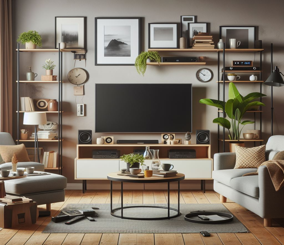

In [42]:
raw_image = Image.open('/content/Home.png')
raw_image.resize((284, 245))

In [43]:
from helper import summarize_predictions_natural_language

In [44]:
text = summarize_predictions_natural_language(pipeline_output)

In [45]:
text

'In this image, there are four books three clocks five potted plants one bowl two couchs two cups one remote one tv and one chair.'

Generate Audio Narration of an Image

In [46]:
tts_pipe = pipeline("text-to-speech",
                    model="kakao-enterprise/vits-ljs")

In [ ]:
narrated_text = tts_pipe(text)

Play the Generated Audio

In [ ]:
from IPython.display import Audio as IPythonAudio

In [ ]:
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])